# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


## **Dataset: Gold Price (2013-2023)**

Dataset yang digunakan dalam eksperimen ini adalah **Gold Price (2013-2023)**, yang berisi data historis harga emas harian selama periode 10 tahun dari Januari 2013 hingga Desember 2022.

### **Deskripsi Dataset**
- **Sumber**: [Gold Price | 10 Years | 2013-2023](https://www.kaggle.com/datasets/farzadnekouei/gold-price-10-years-20132023)
- **Jumlah Baris**: 2,583
- **Format**: CSV
- **Frekuensi**: Data harian

### **Fitur-Fitur Dataset**

Dataset ini terdiri dari **7 kolom utama** yang mencakup informasi penting tentang pergerakan harga emas:

| **Kolom** | **Deskripsi** |
|-----------|---------------|
| **Date** | Tanggal perdagangan dalam format MM/DD/YYYY |
| **Price** | Harga penutupan emas pada hari tersebut (USD/oz) |
| **Open** | Harga pembukaan perdagangan (USD/oz) |
| **High** | Harga tertinggi dalam satu hari perdagangan (USD/oz) |
| **Low** | Harga terendah dalam satu hari perdagangan (USD/oz) |
| **Vol.** | Volume perdagangan dalam ribuan |
| **Change %** | Persentase perubahan harga dari hari sebelumnya |

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Memuat dataset ke dalam DataFrame
df = pd.read_csv('Gold Price (2013-2023)_raw.csv')

In [3]:
# Menampilkan 5 baris pertama dari dataset
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%


In [4]:
# Menampilkan informasi tipe data setiap fitur dalam dataset
df.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

Berdasarkan hasil di atas, seluruh fitur pada dataset masih bertipe data *object*. Oleh karena itu, proses EDA belum dapat dilakukan sebelum fitur-fitur tersebut ditransformasikan ke tipe data yang sesuai. Langkah selanjutnya adalah melakukan data preprocessing terlebih dahulu, kemudian dilanjutkan dengan EDA.

# **4. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
# Menghapus kolom yang tidak diperlukan
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)

# Mengonversi kolom 'Date' ke tipe datetime
df['Date'] = pd.to_datetime(df['Date'])

# Mengurutkan berdasarkan tanggal
df = df.sort_values('Date')

In [6]:
# Menampilkan 5 baris pertama dari dataset
df.head()

,Date,Price,Open,High,Low
2582,2013-01-02,"1,689.90","1,675.80","1,695.00","1,672.10"
2581,2013-01-03,"1,675.60","1,688.00","1,689.30","1,664.30"
2580,2013-01-04,"1,649.90","1,664.40","1,664.40","1,630.00"
2579,2013-01-07,"1,647.20","1,657.30","1,663.80","1,645.30"
2578,2013-01-08,"1,663.20","1,651.50","1,662.60","1,648.80"


In [7]:
# Memeriksa nilai yang hilang
print("Nilai yang hilang di setiap fitur:")
print(df.isnull().sum())

# Menghapus nilai yang hilang jika ada
df.dropna(inplace=True)

Nilai yang hilang di setiap fitur:
Date     0
Price    0
Open     0
High     0
Low      0
dtype: int64


In [8]:
# Mengganti nama kolom 'Price' menjadi 'Close'
df.rename(columns={'Price': 'Close'}, inplace=True)

# Mengatur kolom 'Date' sebagai index
df.set_index('Date', inplace=True)

In [9]:
# Menghapus koma dari semua kolom harga
df['Close'] = df['Close'].str.replace(',', '')
df['Open'] = df['Open'].str.replace(',', '')
df['High'] = df['High'].str.replace(',', '')
df['Low'] = df['Low'].str.replace(',', '')

# Mengonversi ke tipe float
df['Close'] = df['Close'].astype(float)
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)

In [10]:
# Menampilkan informasi tipe data setiap fitur dalam dataset
df.dtypes

Close    float64
Open     float64
High     float64
Low      float64
dtype: object

In [11]:
# Menampilkan 5 baris pertama dari dataset
df.head()

,Close,Open,High,Low
Date,,,,
2013-01-02,1689.9,1675.8,1695.0,1672.1
2013-01-03,1675.6,1688.0,1689.3,1664.3
2013-01-04,1649.9,1664.4,1664.4,1630.0
2013-01-07,1647.2,1657.3,1663.8,1645.3
2013-01-08,1663.2,1651.5,1662.6,1648.8


# **5. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [12]:
# Mengatur gaya visualisasi
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 6)

### Line Plot Harga Emas

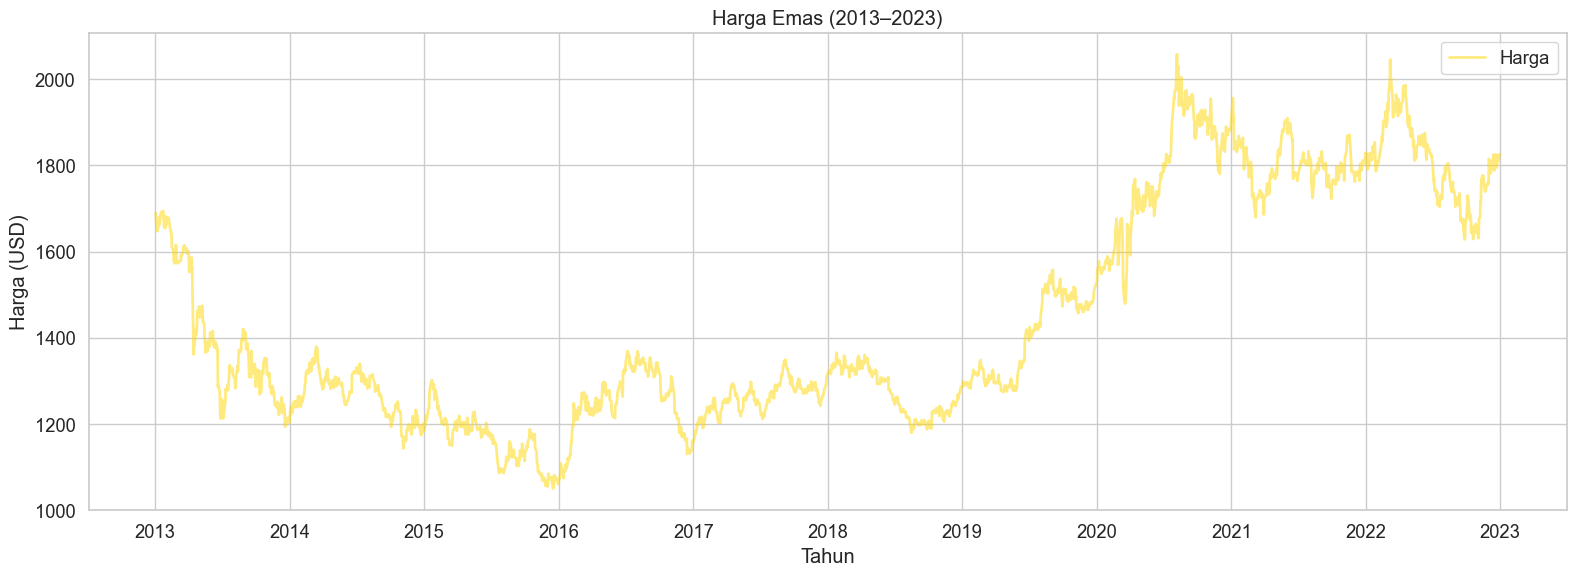

In [13]:
plt.figure(figsize=(16, 6))
plt.plot(df.index, df['Close'], color='gold', linewidth=2, label='Harga', alpha=0.5)
plt.title('Harga Emas (2013–2023)')
plt.xlabel('Tahun')
plt.ylabel('Harga (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Distribusi Harga Emas

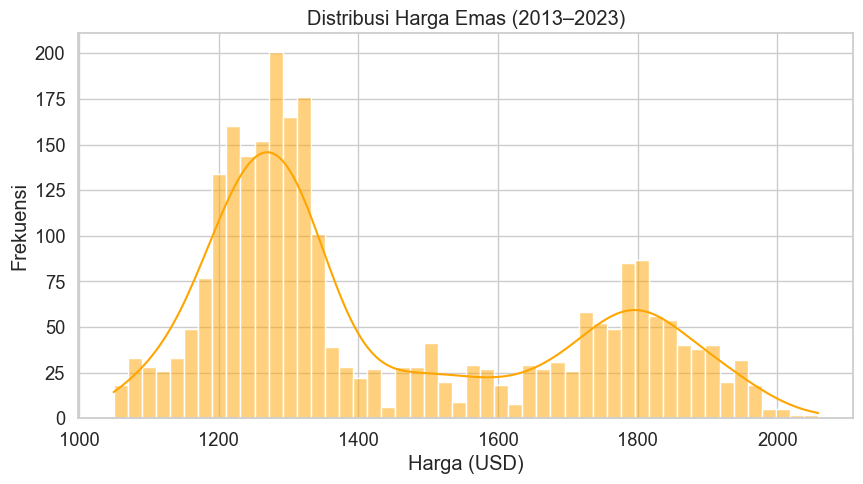

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Close'], bins=50, kde=True, color='orange')
plt.title('Distribusi Harga Emas (2013–2023)')
plt.xlabel('Harga (USD)')
plt.ylabel('Frekuensi')
plt.show()

### Boxplot Harga Emas

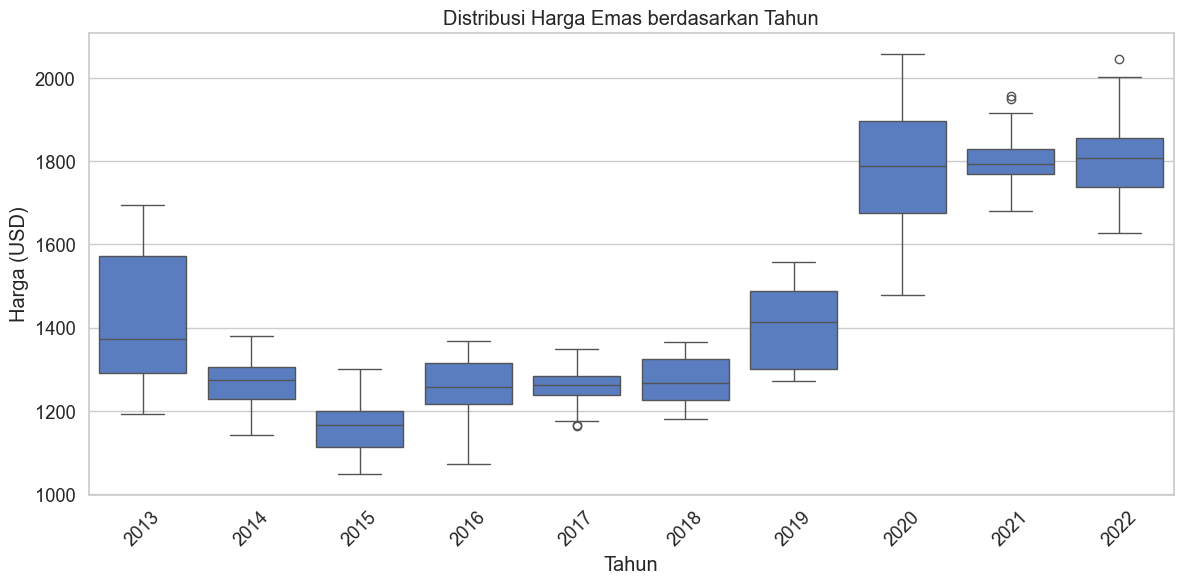

In [15]:
df['Year'] = df.index.year

# Boxplot by Year
plt.figure(figsize=(14, 6))
sns.boxplot(x='Year', y='Close', data=df)
plt.title('Distribusi Harga Emas berdasarkan Tahun')
plt.xticks(rotation=45)
plt.xlabel('Tahun')
plt.ylabel('Harga (USD)')
plt.show()

### Volatilitas Harian Emas

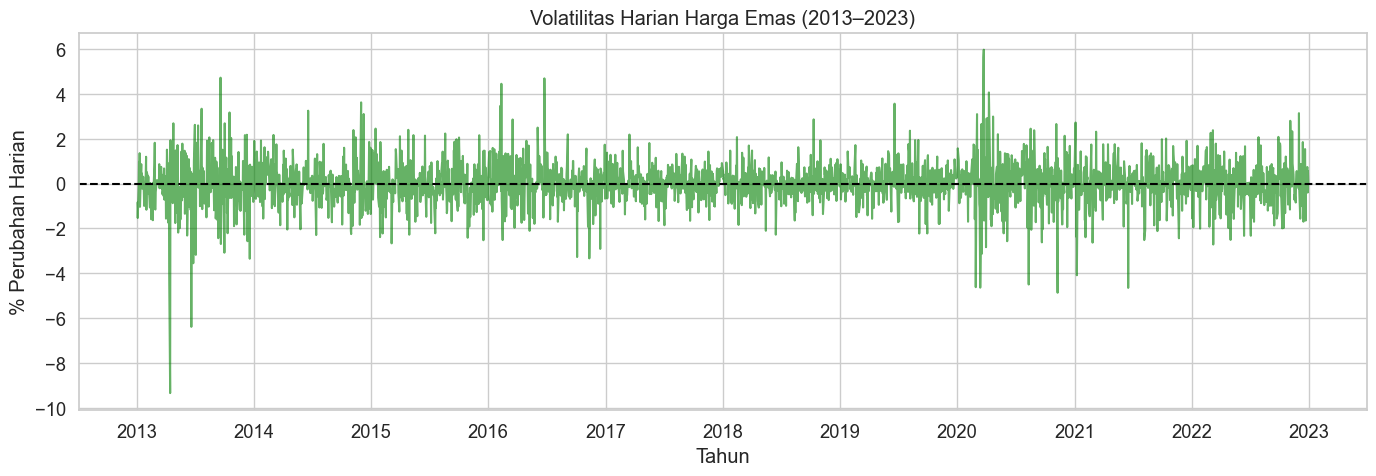

In [16]:
df['Volatility'] = df['Close'].pct_change() * 100

plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Volatility'], color='green', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title('Volatilitas Harian Harga Emas (2013–2023)')
plt.xlabel('Tahun')
plt.ylabel('% Perubahan Harian')
plt.tight_layout()
plt.show()